# Assignment-4 {Q-1}

In [1]:
pip install -U scikit-learn

In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [10]:
import sklearn
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

In [11]:
ls


 Volume in drive C is OS
 Volume Serial Number is 267A-0770

 Directory of C:\Users\HP\Ass-4 SLR

08-07-2022  03:17    <DIR>          .
08-07-2022  03:17    <DIR>          ..
01-07-2022  00:28    <DIR>          .ipynb_checkpoints
08-07-2022  03:17           146,239 Assignment_4 SLR.ipynb
30-06-2022  00:25               218 delivery_time.csv
30-06-2022  00:25               454 Salary_Data.csv
               3 File(s)        146,911 bytes
               3 Dir(s)  48,729,075,712 bytes free


In [12]:
data = pd.read_csv("delivery_time.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [13]:
data.head(2)

,Delivery Time,Sorting Time
0,21.0,10
1,13.5,4


In [14]:
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data.head(2)

,delivery_time,sorting_time
0,21.0,10
1,13.5,4


In [15]:
print (data.shape,"Shape of Data Frame") #rows and columns
print ("="*30) #it will print the line

print (data.head(10)) # top 10 data 

(21, 2) Shape of Data Frame
   delivery_time  sorting_time
0          21.00            10
1          13.50             4
2          19.75             6
3          24.00             9
4          29.00            10
5          15.35             6
6          19.00             7
7           9.50             3
8          17.90            10
9          18.75             9


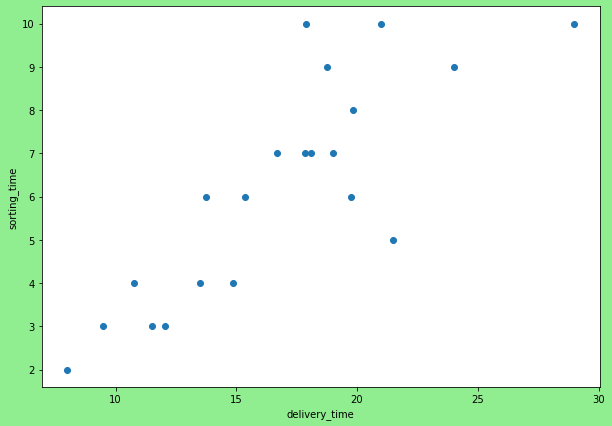

In [16]:
plt.figure(figsize=(10,7),facecolor="lightgreen") 
plt.scatter(data.delivery_time,data.sorting_time)  
plt.xlabel("delivery_time");
plt.ylabel("sorting_time")
plt.show()

In [17]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [18]:
data.sample(5)

,delivery_time,sorting_time
0,21.00,10
5,15.35,6
19,17.83,7
9,18.75,9
3,24.00,9


In [20]:
lm = LinearRegression()

X = data["delivery_time"].values.reshape(-1,1)
Y = data["sorting_time"].values.reshape(-1,1)

lm.fit(X,Y)

LinearRegression()

In [21]:
data["delivery_time"]

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: delivery_time, dtype: float64

In [14]:
data["sorting_time"]

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: sorting_time, dtype: int64

In [15]:
print(lm.coef_)
print(lm.intercept_)

[[0.41374363]]
[-0.75667337]


In [16]:
lm.predict(X)

array([[ 7.93194282],
       [ 4.82886561],
       [ 7.41476329],
       [ 9.17317371],
       [11.24189185],
       [ 5.59429132],
       [ 7.10445557],
       [ 3.1738911 ],
       [ 6.64933758],
       [ 7.00101966],
       [ 7.44786278],
       [ 3.69107064],
       [ 6.14457035],
       [ 4.00137836],
       [ 4.22066248],
       [ 5.39983182],
       [ 4.93230152],
       [ 6.73622374],
       [ 2.55327566],
       [ 6.62037552],
       [ 8.13881464]])

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

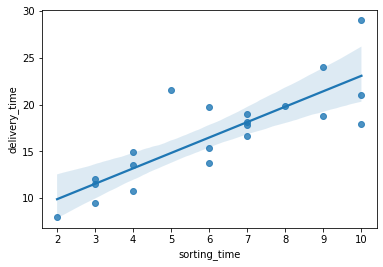

In [17]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

In [18]:
first_model = smf.ols("delivery_time~sorting_time",data=data).fit()

In [19]:
first_model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [20]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           3.98e-06
Time:                        02:11:29   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
second_model = smf.ols("delivery_time~np.log(sorting_time)",data=data).fit()
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           2.64e-06
Time:                        02:11:29   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
third_model = smf.ols("np.log(delivery_time)~sorting_time",data=data).fit()
third_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Fri, 08 Jul 2022   Prob (F-statistic):           1.59e-06
Time:                           02:11:29   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Final Model Testing


In [23]:
third_model.rsquared , third_model.rsquared_adj

(0.7109478980584187, 0.6957346295351776)

In [24]:
 third_model.pvalues

Intercept       1.857343e-14
sorting_time    1.592708e-06
dtype: float64

In [25]:
new_data=pd.Series([10,14])
new_data

0    10
1    14
dtype: int64

In [26]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred


,sorting_time
0,10
1,14


In [27]:
third_model.predict(data_pred)

0    3.176888
1    3.599094
dtype: float64

# Assignment-4 {Q-2} 

In [28]:
ls


 Volume in drive C is OS
 Volume Serial Number is 267A-0770

 Directory of C:\Users\HP\Ass-4 SLR

08-07-2022  02:10    <DIR>          .
08-07-2022  02:10    <DIR>          ..
01-07-2022  00:28    <DIR>          .ipynb_checkpoints
08-07-2022  02:10           116,822 Assignment_4 SLR.ipynb
30-06-2022  00:25               218 delivery_time.csv
30-06-2022  00:25               454 Salary_Data.csv
               3 File(s)        117,494 bytes
               3 Dir(s)  54,518,480,896 bytes free


In [29]:
emp = pd.read_csv("Salary_Data.csv")

In [30]:
emp.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [31]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


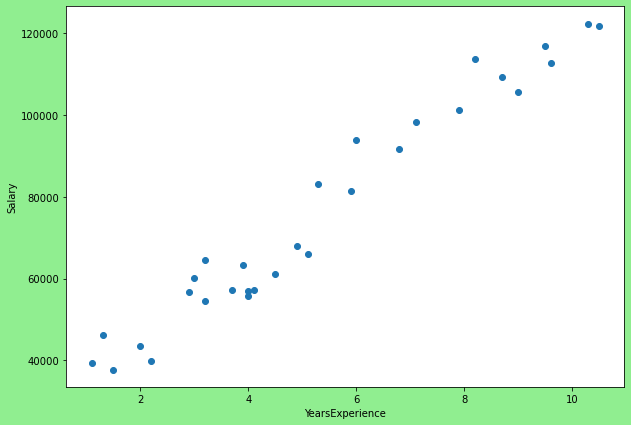

In [32]:
plt.figure(figsize=(10,7),facecolor="lightgreen") 
plt.scatter(emp.YearsExperience,emp.Salary)  
plt.xlabel("YearsExperience");
plt.ylabel("Salary")
plt.show()

In [33]:
emp.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [34]:
emp.sample(5)

,YearsExperience,Salary
26,9.5,116969.0
3,2.0,43525.0
1,1.3,46205.0
13,4.1,57081.0
25,9.0,105582.0


In [35]:
first_model = smf.ols("Salary~YearsExperience",data=emp).fit()

In [36]:
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           1.14e-20
Time:                        02:11:30   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

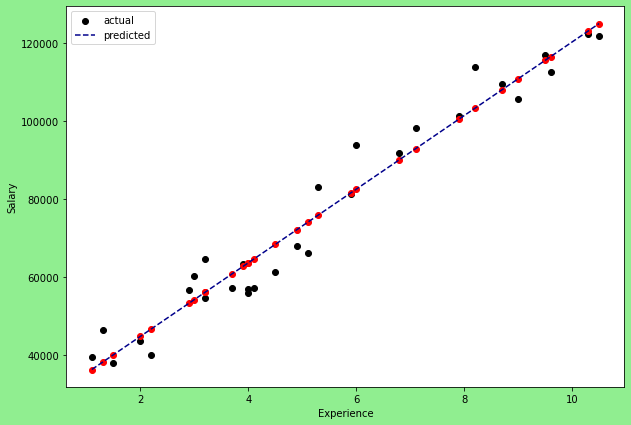

In [54]:
plt.figure(figsize=(10,7),facecolor="lightgreen")
plt.scatter(emp.YearsExperience,(emp.Salary),color="black",label="actual");
plt.plot(emp.YearsExperience,first_model.predict(emp["YearsExperience"]),label="predicted",color="darkblue",linestyle="--");
plt.scatter(emp.YearsExperience,first_model.predict(emp["YearsExperience"]),color="red")
plt.xlabel("Experience");
plt.ylabel("Salary")
# print (wcat.AT)
plt.legend(loc="best")
plt.show()

In [55]:
second_model = smf.ols("np.log(Salary)~(YearsExperience)",data=emp).fit()

In [56]:
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           7.03e-18
Time:                        02:19:24   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
emp["YearsEx_sq"] = emp.YearsExperience**2
third_model = smf.ols("np.log(Salary)~YearsExperience*YearsEx_sq",data =emp).fit()
third_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     169.9
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           3.40e-17
Time:                        02:19:25   Log-Likelihood:                 33.247
No. Observations:                  30   AIC:                            -58.49
Df Residuals:                      26   BIC:                            -52.89
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     10.4485      0.112     93.230      0.000      10.218      10.679
YearsExperience                0.1143      0.076      1.504      0.145      -0.042       0.271
YearsEx_sq                     0.0118      0.015      0.782      0.441      -0.019       0.043
YearsExperience:YearsEx_sq    -0.0011      0.001     -1.236      0.228      -0.003       0.001
==============================================================================
Omnibus:                        1.078   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.583   Jarque-Bera (JB):                1.070
Skew:                           0.366   Prob(JB):                        0.586
Kurtosis:                       2.435   Cond. No.                     3.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
emp.head(2)

,YearsExperience,Salary,YearsEx_sq
0,1.1,39343.0,1.21
1,1.3,46205.0,1.69


In [59]:
# Best model:-
first_model.rsquared , first_model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

In [60]:
first_model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64